In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
%matplotlib inline
import pandas as pd

In [2]:
cmap = ["#440154ff", "#440558ff", "#450a5cff", "#450e60ff", "#451465ff", "#461969ff",
 "#461d6dff", "#462372ff", "#472775ff", "#472c7aff", "#46307cff", "#45337dff",
 "#433880ff", "#423c81ff", "#404184ff", "#3f4686ff", "#3d4a88ff", "#3c4f8aff", 
 "#3b518bff", "#39558bff", "#37598cff", "#365c8cff", "#34608cff", "#33638dff",
 "#31678dff", "#2f6b8dff", "#2d6e8eff", "#2c718eff", "#2b748eff", "#29788eff",
 "#287c8eff", "#277f8eff", "#25848dff", "#24878dff", "#238b8dff", "#218f8dff",
 "#21918dff", "#22958bff", "#23988aff", "#239b89ff", "#249f87ff", "#25a186ff",
 "#25a584ff", "#26a883ff", "#27ab82ff", "#29ae80ff", "#2eb17dff", "#35b479ff",
 "#3cb875ff", "#42bb72ff", "#49be6eff", "#4ec16bff", "#55c467ff", "#5cc863ff",
 "#61c960ff", "#6bcc5aff", "#72ce55ff", "#7cd04fff", "#85d349ff", "#8dd544ff",
 "#97d73eff", "#9ed93aff", "#a8db34ff", "#b0dd31ff", "#b8de30ff", "#c3df2eff",
 "#cbe02dff", "#d6e22bff", "#e1e329ff", "#eae428ff", "#f5e626ff", "#fde725ff"]

In [6]:
fontlabelsize = 24
ticklabelsize = 20

In [3]:
filedirs = ['/home/nefta/thesis/results/qpc/conductance/vbg=0.1-20180210-18:19:55/',
            '/home/nefta/thesis/results/qpc/conductance/vbg=0.15-20180210-18:31:54/',
            '/home/nefta/thesis/results/qpc/conductance/vbg=0.2-20180210-18:44:06/',
            '/home/nefta/thesis/results/qpc/conductance/vbg=0.25-20180210-18:56:31/',
            '/home/nefta/thesis/results/qpc/conductance/vbg=0.3-20180210-19:09:12/']

In [26]:
delta_cmap = round(len(cmap) / len(filedirs))

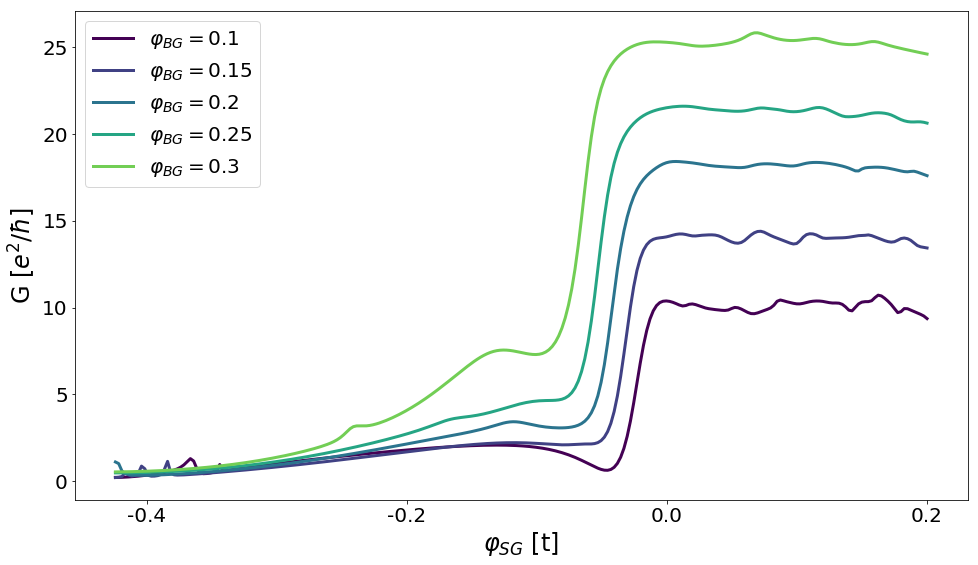

In [41]:
phi_sg = np.linspace(-0.8, 0.2, 400)[150:]
fig, ax = plt.subplots(figsize=(16, 9))
labels = [0.1, 0.15, 0.2, 0.25, 0.3]
#for filedir, plotlabel in zip(filedirs, labels):
for index, filedir in enumerate(filedirs):    
    plotlabel = labels[index]
    data = pd.read_csv(filedir + 'data.csv', 
                       header=None, delimiter=' ').values[0][150:]
    ax.plot(phi_sg, data, 
            label=r'$\varphi_{{BG}} = {}$'.format(plotlabel),
            color=cmap[index * delta_cmap], linewidth=3)
#ax.plot(phi_sg, 0*np.ones(len(phi_sg)),)
ax.legend(loc=2, prop={'size': ticklabelsize})
ax.set_xlabel(r'$\varphi_{SG}$ [t]', fontsize=fontlabelsize)
ax.set_ylabel(r'G [$e^2/ \hbar$]', fontsize=fontlabelsize)

ax.set_xticks([0.2, 0.0, -0.2, -0.4])
ax.set_xticklabels([0.2, 0.0, -0.2, -0.4], fontsize=ticklabelsize)
ax.set_yticks([0, 5, 10, 15, 20, 25])
ax.set_yticklabels([0, 5, 10, 15, 20, 25], fontsize=ticklabelsize)

#fig.savefig('/home/nefta/thesis/Masterthesis/figure/qpc-conductance.eps')

In [6]:
data = pd.read_csv(filedirs[0] + 'data.csv', header=None, delimiter=' ').values

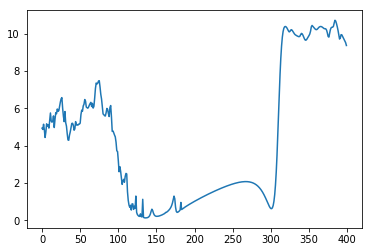

In [11]:
plt.plot(data[0])

## QPC heatmap

In [2]:
header_bfield = ['b{}'.format(index) for index in range(500)]

In [3]:
data1 = pd.read_csv('/home/nefta/thesis/results/qpc/supercurrent-map/vbg=0.2-20180125-21:13:52/data.csv',
           names=header_bfield, delimiter=' ')
data2 = pd.read_csv('/home/nefta/thesis/results/qpc/supercurrent-map/vbg=0.2-20180125-21:15:18/data.csv',
                   names=header_bfield, delimiter=' ')
data3 = pd.read_csv('/home/nefta/thesis/results/qpc/supercurrent-map/vbg=0.2-20180125-21:16:13/data.csv',
                   names=header_bfield, delimiter=' ')
data4 = pd.read_csv( '/home/nefta/thesis/results/qpc/supercurrent-map/vbg=0.2-20180125-21:17:09/data.csv',
                   names=header_bfield, delimiter=' ')


In [4]:
data2.set_index(np.arange(25, 50), inplace=True)
data3.set_index(np.arange(50, 75), inplace=True)
data4.set_index(np.arange(75, 100), inplace=True)

In [5]:
data = pd.concat([data1, data2, data3, data4])

In [8]:
data.drop(25, inplace=True)
data.drop(50, inplace=True)
data.drop(75, inplace=True)

In [75]:
icnorm = [data.ix[index].values / max(data.ix[index]) for index in data.index.values]


In [9]:
maxB = 9e-05
bvalues = np.linspace(-maxB, maxB, 500)
phi_sg = np.linspace(0.0, -0.05, 97)
fluxvalues = bvalues * 700 * 210

In [36]:
deltaf = fluxvalues[1] - fluxvalues[0]
deltaphi = phi_sg[1] - phi_sg[0]

In [56]:
phi_sg[0], phi_sg[21], phi_sg[40], phi_sg[58], phi_sg[78], phi_sg[-1]
#phiticks = [0, 21, 40, 58, 78, 96]

(0.0,
 -0.010937499999999999,
 -0.020833333333333332,
 -0.030208333333333334,
 -0.040625000000000001,
 -0.050000000000000003)

In [55]:
vfluxvalues[249], fluxvalues[249-94], fluxvalues[249+95], fluxvalues[249-188],  fluxvalues[249+188]
#fluxticks = [249+188, 249+94, 249, 249-94, 249-188]

(-0.026513026052103952,
 -5.0109619238476952,
 5.010961923847697,
 -9.9954108216432864,
 9.9423847695390801)

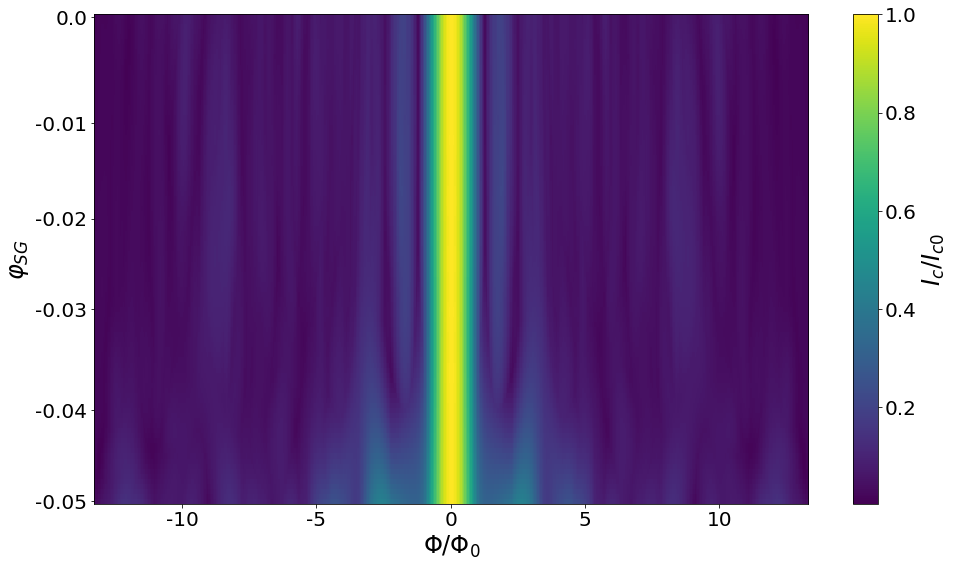

In [84]:
fontlabelsize = 24
ticklabelsize = 20
fig, ax = plt.subplots(figsize=(16, 9))
cax = ax.imshow(np.asarray(icnorm), interpolation='None', aspect='auto')
#cax = ax.imshow(np.asarray(data.values), interpolation='None', aspect='auto')
cbar = fig.colorbar(cax,)
cbar.ax.tick_params(labelsize=ticklabelsize)

cbar.set_label(r'$I_c / I_{c0}$', fontsize=fontlabelsize)
#cbar.set_label(r'$I_c$', fontsize=fontlabelsize)
ax.set_xlabel(r'$\Phi / \Phi_0$',  fontsize=fontlabelsize)
ax.set_ylabel(r'$\varphi_{SG}$', fontsize=fontlabelsize)

ax.xaxis.set_ticks([61, 155, 249, 343, 437])
ax.xaxis.set_ticklabels([-10, -5, 0, 5, 10], fontsize=ticklabelsize)
ax.yaxis.set_ticks(phiticks)
ax.yaxis.set_ticklabels([0.0, -0.01, -0.02, -0.03, -0.04, -0.05], fontsize=ticklabelsize)
fig.savefig('/home/nefta/thesis/Masterthesis/figure/qpc_icnorm_heatmap.eps')

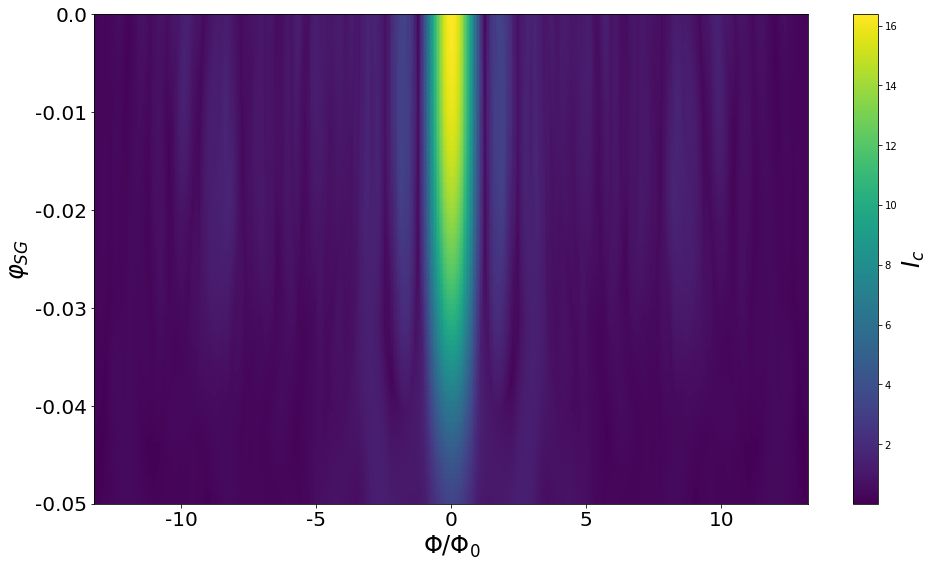

In [138]:
fontlabelsize = 24
ticklabelsize = 20
fig, ax = plt.subplots(figsize=(16, 9))
X, Y = np.meshgrid(fluxvalues, phi_sg)
cax = ax.pcolormesh(X, Y, data.values)
cbar = fig.colorbar(cax)
cbar.set_label(r'$I_c$', fontsize=fontlabelsize)
ax.set_xlabel(r'$\Phi / \Phi_0$', fontsize=fontlabelsize)
ax.set_ylabel(r'$\varphi_{SG}\cdot 10^{-2}$', fontsize=fontlabelsize)
ax.xaxis.set_ticks([-10, -5, 0, 5, 10])
ax.xaxis.set_ticklabels([-10, -5, 0, 5, 10], fontsize=ticklabelsize)
ax.yaxis.set_ticks([0.0, -0.01, -0.02, -0.03, -0.04, -0.05])
ax.yaxis.set_ticklabels([0.0, -0.01, -0.02, -0.03, -0.04, -0.05], fontsize=ticklabelsize)
#ax.yaxis.set_ticklabels([0, -2.5, -5], fontsize=ticklabelsize)
fig.savefig('/home/nefta/thesis/Masterthesis/figure/testheatmap.eps')

### Next Steps
* Conductance plots for QPC